# IBM Employee Churn Prediction

The task at hand is to help IBM retain their valuable employees. I will do this by predicting attrition of those employees and exploring what the key drivers of employee churn are.

Four datasets need to be merged so I can find out what department each employee works in, what their job title is, whats causing employee attrition and finally to gather all the features for prediction.

To predict attrition of IBM's valuable employees, I will build and compare three different classification models. 

--------------------------------------------------------------------------

<h3 align="center">Reading in Data</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [2]:
employees = pd.read_csv('data/train1.csv')
employees.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


__employees__ gives us information about the employees such as age, gender, income, education. martial status, satisfaction, attrition and more.

<h3 align="center">Data Wrangling</h3> 

Here I will be cleaning and preprocessing the datasets. I will be checking for any nulls.

In [3]:
employees.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h3 align="center">Exploratory Data Analysis (EDA)</h3> 

In the exploratory data analysis (EDA) portion of this project, I will be looking at some descriptive statistics and answering the following questions:

1. How many employees have stayed? How many have left?
1. What departments do employees work in?
1. How many distinct job roles are there?
1. What seems to be the key drivers of employee churn?

### Descriptive Stats

Going to look at the shape of each dataset and make sure the types make sense. There are 1470 employees so this should reflect as well.

In [4]:
employees.shape

(1058, 35)

In [5]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

__departments__ gives the departments within the company and their codes/numbers

In [6]:
departments=pd.read_csv('data/departments.csv')
departments

,dept_no,dept_name
0,d001,Human Resources
1,d002,Research & Development
2,d003,Sales


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_no    3 non-null      object
 1   dept_name  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [8]:
dept_emp=pd.read_csv('data/dept_emp.csv')
dept_emp.head()

,EmployeeNumber,dept_name
0,1,Sales
1,2,Research & Development
2,4,Research & Development
3,5,Research & Development
4,7,Research & Development


In [9]:
dept_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  1058 non-null   int64 
 1   dept_name       1058 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


In [10]:
emp_job=pd.read_excel('data/emp_job.xlsx')
emp_job.head()

,EmployeeNumber,JobRole
0,1,Sales Executive
1,2,Research Scientist
2,4,Laboratory Technician
3,5,Research Scientist
4,7,Laboratory Technician


__emp_job__ gives the job roles of each employee within the company

In [11]:
emp_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  1058 non-null   int64 
 1   JobRole         1058 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


The types are correct and make sense. The shapes also make sense.

### How many employees have stayed? How many have left?

([<matplotlib.patches.Wedge at 0x223583a4fd0>,
 [Text(-1.0344469963369889, 0.6082100063048796, 'no'),
  Text(1.034447024809353, -0.6082099578789203, 'yes')],
 [Text(-0.6034274145299102, 0.3547891703445131, '83.1%'),
  Text(0.6034274311387892, -0.35478914209603685, '16.9%')])

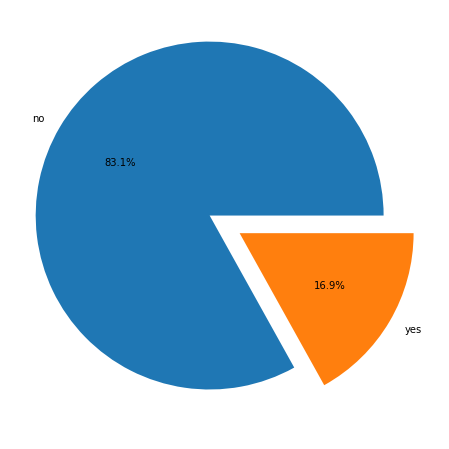

In [12]:
plt.figure(figsize=(8, 8))
pie =employees.groupby('Attrition')['Attrition'].count()
plt.pie(pie,explode=[0.1,0.1],labels=['no','yes'],autopct='%1.1f%%')

83.9% (1233) of IBM's employees have stayed, while 16.1% (237) have left.

### What departments do employees work in?

To do this, we're going to have to join the __departments__ and __dept_emp__ tables. I'm going to use an __inner join__ because I want to combine records from the two tables whenever there are matching values in a dept_no column.

In [82]:
new_department = pd.merge(departments, dept_emp, how='inner',on=['dept_name'])
new_department

,dept_no,dept_name,EmployeeNumber
0,d001,Human Resources,103
1,d001,Human Resources,133
2,d001,Human Resources,140
3,d001,Human Resources,148
4,d001,Human Resources,177
...,...,...,...
1053,d003,Sales,1478
1054,d003,Sales,1479
1055,d003,Sales,1481
1056,d003,Sales,1486


Now we can see each department name and number assigned to the IBM employees.

__How many distinct departments are there in the company?__ I'm going to use a for loop to count the number of unique departments among the employees at IMB. I'm going to count the number of unique values in the column __'dept_name'__.

The for loop iterates throuhg the __dept_name__ column and for each name, checks whether it has already been visited in the dept list. The count is incremented by one, if the name has not yet been visited.

In [83]:
emp_job.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

The print() function creates a side effect. The side effect tells us there are 3 unique departments at IBM among these 1470 employees.

### How many distinct job roles are there?

I'm going to use the __unique() function__ to determine the unique roles at IBM. 

In [84]:
emp_job['JobRole'].value_counts()

Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: JobRole, dtype: int64

There are __9 distinct roles__ at IBM. The role that has the most employees is 'Sales Executive', while the one thta has the leats is 'Human Resources'.

### What seems to be the key drivers of employee churn?

To analyze this, we need one dataset that has all the features we need. First, I'm going to join our __new_departments__ table containing the department number, department name and employee number to the __job_roles__ table. I'm going to use a __full outer join__ because I want all rows from both dataframes to be present

I'll call it __job_info__ since it contains information about each employees job.

In [85]:
job_info= pd.merge(new_department, emp_job, how='outer',on=['EmployeeNumber'])
job_info

,dept_no,dept_name,EmployeeNumber,JobRole
0,d001,Human Resources,103,Human Resources
1,d001,Human Resources,133,Human Resources
2,d001,Human Resources,140,Manager
3,d001,Human Resources,148,Manager
4,d001,Human Resources,177,Human Resources
...,...,...,...,...
1053,d003,Sales,1478,Sales Executive
1054,d003,Sales,1479,Sales Executive
1055,d003,Sales,1481,Sales Executive
1056,d003,Sales,1486,Sales Representative


In [86]:
employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Now I will concat our new __job_info__ dataset to the __employees__ dataset so we can begin exploring out EDA question.

In [87]:
job_info=job_info.rename(columns={'dept_no':'DepartmentNumber','dept_name':'Department'})
job_info

,DepartmentNumber,Department,EmployeeNumber,JobRole
0,d001,Human Resources,103,Human Resources
1,d001,Human Resources,133,Human Resources
2,d001,Human Resources,140,Manager
3,d001,Human Resources,148,Manager
4,d001,Human Resources,177,Human Resources
...,...,...,...,...
1053,d003,Sales,1478,Sales Executive
1054,d003,Sales,1479,Sales Executive
1055,d003,Sales,1481,Sales Executive
1056,d003,Sales,1486,Sales Representative


Where concat cannot align you will get NaN values. My solution to that is reseting the indices of the two datasets that I am merging togetehr.

In [113]:
job_info.reset_index(drop=True,inplace=True)
employees.reset_index(drop=True,inplace=True)


In [89]:
new_employees=pd.concat([job_info.set_index('EmployeeNumber'),employees.set_index('EmployeeNumber')],axis=1)
new_employees.sort_index(inplace=True)
new_employees=new_employees.T.drop_duplicates().T
new_employees.head()

,DepartmentNumber,Department,JobRole,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,d003,Sales,Sales Executive,41,1,Travel_Rarely,1102,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
2,d002,Research & Development,Research Scientist,49,0,Travel_Frequently,279,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
4,d002,Research & Development,Laboratory Technician,37,1,Travel_Rarely,1373,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
5,d002,Research & Development,Research Scientist,33,0,Travel_Frequently,1392,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
7,d002,Research & Development,Laboratory Technician,27,0,Travel_Rarely,591,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2


We can see that are new dataframe has 1470 records. This is good since there are 1470 employees.

__Now what is causing employee attrition?__

We can get an idea of this by looking at the correlations between the features in this datatset.

In [114]:
employees.corr()



,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172067,0.010507,-0.022753,0.180723,NaN,0.013321,0.029247,0.005901,0.044010,...,0.052445,NaN,0.010683,0.690428,-0.004970,-0.026016,0.313454,0.210148,0.211967,0.194128
Attrition,-0.172067,1.000000,-0.051992,0.078074,-0.032631,NaN,0.033647,-0.132848,-0.017524,-0.150196,...,-0.053417,NaN,-0.164228,-0.177137,-0.047859,-0.059556,-0.135134,-0.158757,-0.031944,-0.155962
DailyRate,0.010507,-0.051992,1.000000,0.027120,-0.039805,NaN,-0.055462,0.023005,0.038572,0.058871,...,-0.013600,NaN,0.044321,0.024266,-0.000817,-0.057479,-0.047141,-0.001487,-0.047469,-0.038338
DistanceFromHome,-0.022753,0.078074,0.027120,1.000000,0.006185,NaN,0.000823,-0.020197,0.048494,0.051250,...,0.010755,NaN,0.048544,-0.025465,-0.005176,-0.051469,-0.028687,-0.005367,-0.009304,-0.005352
Education,0.180723,-0.032631,-0.039805,0.006185,1.000000,NaN,0.006851,-0.002332,0.026237,0.034317,...,0.008438,NaN,-0.005877,0.131213,-0.039092,0.010054,0.055830,0.070081,0.064578,0.080093
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.013321,0.033647,-0.055462,0.000823,0.006851,NaN,1.000000,0.016635,0.038996,0.010762,...,-0.096426,NaN,0.031391,0.021626,-0.007399,0.026469,0.001962,-0.000527,0.001439,-0.008854
EnvironmentSatisfaction,0.029247,-0.132848,0.023005,-0.020197,-0.002332,NaN,0.016635,1.000000,-0.064578,0.012431,...,-0.003999,NaN,0.021579,0.007392,-0.031968,0.017335,0.002463,0.027112,0.022197,0.002739
HourlyRate,0.005901,-0.017524,0.038572,0.048494,0.026237,NaN,0.038996,-0.064578,1.000000,0.047156,...,-0.012714,NaN,0.021539,-0.017238,-0.017006,-0.001058,-0.022893,-0.035471,-0.049503,-0.031806
JobInvolvement,0.044010,-0.150196,0.058871,0.051250,0.034317,NaN,0.010762,0.012431,0.047156,1.000000,...,0.049298,NaN,0.043353,-0.007514,-0.030002,-0.029776,-0.011757,0.009100,-0.017878,0.032704


The columns displaying NaN are irrelevant features for looking at correlations so let's drop them.

In [115]:
employees_df=employees.drop(['EmployeeCount','StandardHours'],axis=1)
employees_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [116]:
corr=employees_df.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172067,0.010507,-0.022753,0.180723,0.013321,0.029247,0.005901,0.044010,0.506484,...,-0.033426,0.052445,0.010683,0.690428,-0.004970,-0.026016,0.313454,0.210148,0.211967,0.194128
Attrition,-0.172067,1.000000,-0.051992,0.078074,-0.032631,0.033647,-0.132848,-0.017524,-0.150196,-0.169201,...,0.007755,-0.053417,-0.164228,-0.177137,-0.047859,-0.059556,-0.135134,-0.158757,-0.031944,-0.155962
DailyRate,0.010507,-0.051992,1.000000,0.027120,-0.039805,-0.055462,0.023005,0.038572,0.058871,0.003042,...,0.016809,-0.013600,0.044321,0.024266,-0.000817,-0.057479,-0.047141,-0.001487,-0.047469,-0.038338
DistanceFromHome,-0.022753,0.078074,0.027120,1.000000,0.006185,0.000823,-0.020197,0.048494,0.051250,-0.024838,...,0.030428,0.010755,0.048544,-0.025465,-0.005176,-0.051469,-0.028687,-0.005367,-0.009304,-0.005352
Education,0.180723,-0.032631,-0.039805,0.006185,1.000000,0.006851,-0.002332,0.026237,0.034317,0.094922,...,-0.043008,0.008438,-0.005877,0.131213,-0.039092,0.010054,0.055830,0.070081,0.064578,0.080093
EmployeeNumber,0.013321,0.033647,-0.055462,0.000823,0.006851,1.000000,0.016635,0.038996,0.010762,0.025940,...,-0.065974,-0.096426,0.031391,0.021626,-0.007399,0.026469,0.001962,-0.000527,0.001439,-0.008854
EnvironmentSatisfaction,0.029247,-0.132848,0.023005,-0.020197,-0.002332,0.016635,1.000000,-0.064578,0.012431,0.016439,...,-0.046762,-0.003999,0.021579,0.007392,-0.031968,0.017335,0.002463,0.027112,0.022197,0.002739
HourlyRate,0.005901,-0.017524,0.038572,0.048494,0.026237,0.038996,-0.064578,1.000000,0.047156,-0.021084,...,-0.011632,-0.012714,0.021539,-0.017238,-0.017006,-0.001058,-0.022893,-0.035471,-0.049503,-0.031806
JobInvolvement,0.044010,-0.150196,0.058871,0.051250,0.034317,0.010762,0.012431,0.047156,1.000000,-0.008003,...,-0.015850,0.049298,0.043353,-0.007514,-0.030002,-0.029776,-0.011757,0.009100,-0.017878,0.032704
JobLevel,0.506484,-0.169201,0.003042,-0.024838,0.094922,0.025940,0.016439,-0.021084,-0.008003,1.000000,...,-0.061532,0.026113,0.019655,0.786925,-0.006301,0.037285,0.546310,0.410976,0.361694,0.380084


<AxesSubplot:>

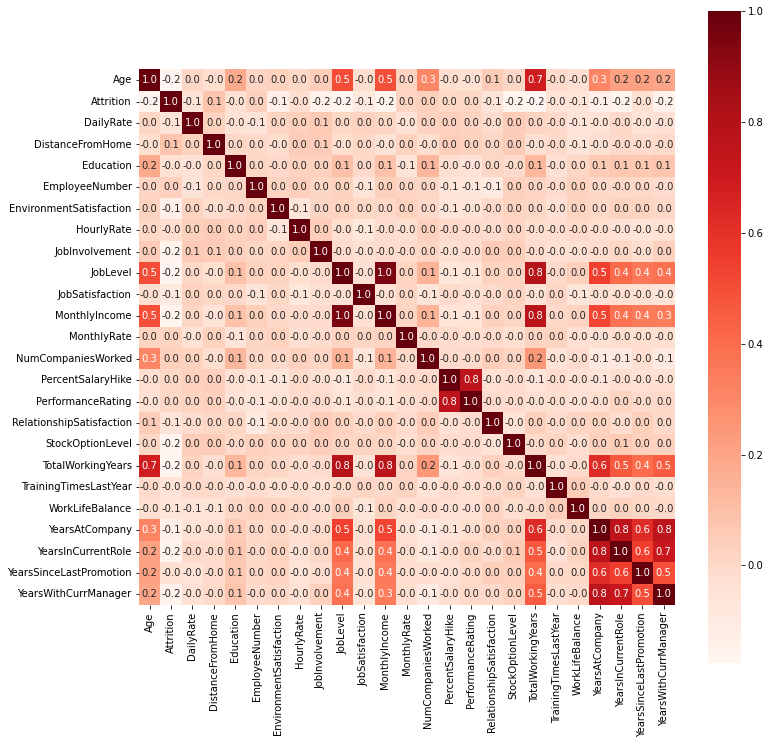

In [117]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='Reds',cbar=True,square=True,fmt='.1f')

Much better!

While there isn't any significant correlations of the 'Attrition' column with any of the numerical columns, we can look to draw information from other correlations.

- Age and TotalWorkingYears are highly correlated. This would assume that older employees have worked longer.

- MonthlyIncome and TotalWorkingYears are highly correlated insinuating that an employee's monthly income increases as they work longer

- PerformanceRating and PercentSalaryHike are also highly correlated. Higher performance ratings leader to salary increases

- YearsInCurrentRole is highly correlated with YearsAtCompany and YearsWithCurrManager and moderatly correlated with YearsSinceLastPromotion. This insinuates that many employees remain in their current role under the same manager overtime and there isn't much opportunity for promotion

If you put on the hat of a Business Analyst, you can deduct and report to IBM stakeholders that lack of promotions may be a crucial factor to attritions.

So what seems to be the key drivers of employee churn? Lack of promotion seems to be the key driver.

<h3 align="center">Preparing for Predicition</h3> 

In [118]:
employees_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**I'm going to drop any features that aren't key factors.**

In [141]:
employees_df.drop(['Department','BusinessTravel','Gender','EducationField','JobRole','OverTime','MaritalStatus','Over18'],axis=1,inplace=True)
employees_df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Now I'll define x and y. Y will be 'Attrition' our target variable and X will be the remaining features.

In [142]:
X_train=employees_df.drop(['Attrition'],axis=1)
y_train=employees_df['Attrition']

Now I will split the data into training and testing sets.

In [127]:
test=pd.read_csv('data/test.csv')

test.drop(['EmployeeCount','StandardHours','Department','BusinessTravel','Gender','EducationField','JobRole','OverTime','MaritalStatus','Over18'],axis=1,inplace=True)
test.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [174]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(test)
y_pred.shape=(412,1)
test['Attrition']=y_pred

In [169]:
X_test=test.drop(['Attrition'],axis=1)
y_test=test['Attrition']

<h3 align="center">Model Building</h3> 


I'm going to build three different classification models - Gaussian Naive Bayes, Logistic Regression and SVM. The I will compare them.

I'm going to use a for loop to iterate on the models.

In [170]:
classifiers=(GaussianNB(),
             LogisticRegression(solver='liblinear',max_iter=1000),
             DecisionTreeClassifier())

log_columns=['Classifier','Accuracy','Log Loss']
log=pd.DataFrame(columns=log_columns)

for clf in classifiers:
    clf.fit(X_train,y_train)
    name=clf.__class__.__name__
    
    print('='*30)
    print(name)
    
    print('****Results****')
    train_predictions=clf.predict(X_test)
    acc=accuracy_score(y_test,train_predictions)
    print('Accuracy: {:.4%}'.format(acc))
    
    train_predictions=clf.predict_proba(X_test)
    ll=log_loss(y_test,train_predictions)   
    print('Log Loss: {:.4}'.format(ll))
    
    log_entry=pd.DataFrame([[name,acc*100,ll]],columns=log_columns)
    log=log.append(log_entry)
    
print('='*30)

GaussianNB
****Results****
Accuracy: 67.9612%
Log Loss: 0.7617
LogisticRegression
****Results****
Accuracy: 73.0583%
Log Loss: 0.5813
DecisionTreeClassifier
****Results****
Accuracy: 94.9029%
Log Loss: 1.76


C:\Users\91876\AppData\Local\Temp\ipykernel_10980\2956080374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
C:\Users\91876\AppData\Local\Temp\ipykernel_10980\2956080374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
C:\Users\91876\AppData\Local\Temp\ipykernel_10980\2956080374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)


Let's visualize the model accuracy

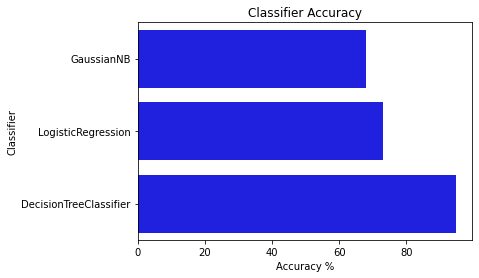

In [172]:
#Accuracy plot
sns.barplot(x='Accuracy',y='Classifier',data=log,color='b')
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


<h3 align="center">Interpretting the Models</h3> 

So our results show that the GaussianNB model gives ~70% accuracy, the Logisitc Regression model gives ~73% accuracy and the Decision Tree model gives ~95% accuracy.

Since our Decision Tree model performs the best, let's optimize it to see if we can get better accuracy.

In [179]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9635922330097088

### Grid Search Optimization

In [180]:
from sklearn.model_selection import GridSearchCV

In [184]:
clf_opt=GridSearchCV(estimator=clf,n_jobs=-1,scoring='accuracy',error_score=0,param_grid={'max_depth':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8,9,10]})

In [185]:
clf_opt.fit(X_train,y_train)

GridSearchCV(error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [186]:
clf_opt.cv_results_

{'mean_fit_time': array([0.0038033 , 0.00379953, 0.00359955, 0.00340214, 0.004     ,
        0.00400171, 0.0040029 , 0.00440054, 0.00400028, 0.00300055,
        0.00320029, 0.00420032, 0.00380044, 0.00359969, 0.00360065,
        0.00380239, 0.00400176, 0.0039999 , 0.0041995 , 0.00419974,
        0.0046021 , 0.004599  , 0.00460172, 0.00419793, 0.00440021,
        0.00440068, 0.0046021 , 0.00460105, 0.00520172, 0.00499978,
        0.00460114, 0.00400023, 0.00499964, 0.00400105, 0.00580034,
        0.00480351, 0.00499964, 0.00399966, 0.00520215, 0.00520148,
        0.00480466, 0.00440154, 0.00479679, 0.00539956, 0.00760245,
        0.00459709, 0.00459971, 0.00660024, 0.00559735, 0.00440178,
        0.00460277, 0.0048027 , 0.00500054, 0.00639944, 0.00460186,
        0.00379748, 0.00460143, 0.00459995, 0.00380092, 0.00580211,
        0.006001  , 0.00460033, 0.00500054, 0.00520158, 0.00480165,
        0.00520034, 0.00459976, 0.00500135, 0.00460119, 0.00480123,
        0.0048007 , 0.00459933,

In [187]:
pd.DataFrame(clf_opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003803,0.000749,0.002000,1.173833e-06,2,2,2,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.820755,0.825472,0.825472,0.829384,0.829384,0.826093,0.003192,1
1,0.003800,0.000400,0.001602,4.907678e-04,2,2,3,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.820755,0.825472,0.825472,0.829384,0.829384,0.826093,0.003192,1
2,0.003600,0.000488,0.001600,4.901360e-04,2,2,4,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.820755,0.825472,0.825472,0.829384,0.829384,0.826093,0.003192,1
3,0.003402,0.000492,0.001800,3.970654e-04,2,2,5,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.820755,0.825472,0.825472,0.829384,0.829384,0.826093,0.003192,1
4,0.004000,0.000631,0.002000,9.122432e-07,2,2,6,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.820755,0.825472,0.825472,0.829384,0.829384,0.826093,0.003192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0.008002,0.000001,0.001600,4.915180e-04,10,10,6,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.768868,0.797170,0.778302,0.810427,0.786730,0.788299,0.014480,573
725,0.008202,0.000748,0.001801,4.011171e-04,10,10,7,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.759434,0.797170,0.778302,0.810427,0.786730,0.786412,0.017240,601
726,0.007801,0.000400,0.001800,4.009733e-04,10,10,8,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.759434,0.797170,0.778302,0.810427,0.786730,0.786412,0.017240,601
727,0.007803,0.000399,0.002001,1.895390e-06,10,10,9,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.768868,0.797170,0.778302,0.810427,0.786730,0.788299,0.014480,573


In [189]:
y_pred2=clf_opt.predict(X_test)

In [190]:
clf_opt.score(X_test,y_test)

0.7402912621359223

Still ~88% accuracy

### Best performing model parameter

In [191]:
clf_opt.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [192]:
clf_best=DecisionTreeClassifier(max_depth=2,min_samples_leaf=2,min_samples_split=2)

In [193]:
clf_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [195]:
y_pred3=clf_best.predict(X_test)
clf_best.score(X_test,y_test)

0.7402912621359223

**So the Logistic Regression model is still 88% accurate after optimizing and using the best parameters but it performed better before optimizing/changing the parameters.**
Model Performed better before optimizing

So let's further evaluate the original model to interpret it.

In [196]:
from sklearn.metrics import confusion_matrix

In [199]:
con_matrix=confusion_matrix(y_test,y_pred1)
con_matrix

array([[294,   6],
       [  9, 103]], dtype=int64)

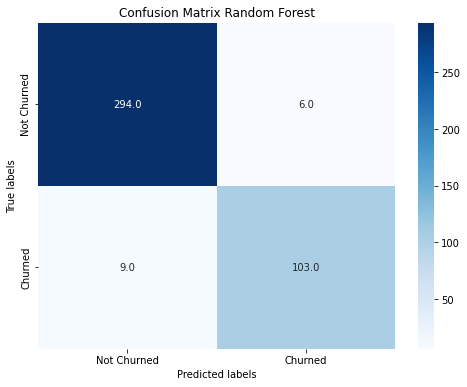

In [200]:
#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax=plt.subplot()
sns.heatmap(con_matrix,cmap='Blues',annot=True,fmt='.1f',ax=ax);


#labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');

The dimension of this matrix is 2*2 because this model is binary classification. The classes of the Attrition variable are 0 and 1.

88% (325/368) of the IBM employees were correctly classified as churned and not churned.

In [201]:
from sklearn.metrics import classification_report

target_names=['Not Churned','Churned']
print(classification_report(y_test,y_pred1,target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.97      0.98      0.98       300
     Churned       0.94      0.92      0.93       112

    accuracy                           0.96       412
   macro avg       0.96      0.95      0.95       412
weighted avg       0.96      0.96      0.96       412



<h3 align="center">Final Analysis</h3> 

From this analysis, we can draw two things. The Logistic Regression classifier is the best compared to the Decision Tree and Gaussian NB. To improve accuracy we could try different models or use more training data.

The correlation analysis told us that the key driver of employee churn is lack of promotions. IBM can improve retention among their employees by implementing more opportunities for promotion.